<a href="https://colab.research.google.com/github/pheb2014939ctu/Clothes_Selling_Website/blob/main/submit_fnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
# Load dataset
path = "/content/drive/MyDrive/0.Luận văn tốt nghiệp /0Android_RansomewareUnderSampleAll.csv"
df = pd.read_csv(path, index_col=0)
print(df.info())
# Preprocessing
# Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Apply NearMiss under-sampling
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)

<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 392033
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      392034 non-null  int64  
 1   Source IP                    392034 non-null  int64  
 2   Source Port                  392034 non-null  int64  
 3   Destination IP               392034 non-null  int64  
 4   Destination Port             392034 non-null  int64  
 5   Protocol                     392034 non-null  int64  
 6   Flow Duration                392034 non-null  int64  
 7   Total Fwd Packets            392034 non-null  int64  
 8   Total Backward Packets       392034 non-null  int64  
 9   Total Length of Fwd Packets  392034 non-null  int64  
 10  Total Length of Bwd Packets  392034 non-null  int64  
 11  Fwd Packet Length Max        392034 non-null  int64  
 12  Fwd Packet Length Min        392034 non-null  int64  
 13  Fwd 

In [6]:
X_resampled.shape, y_resampled.shape

((86182, 71), (86182,))

In [7]:
X_test.shape, y_test.shape

((17237, 71), (17237,))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7922 - loss: 0.4358 - val_accuracy: 0.8223 - val_loss: 0.3928
Epoch 2/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8212 - loss: 0.3906 - val_accuracy: 0.8233 - val_loss: 0.3825
Epoch 3/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8252 - loss: 0.3809 - val_accuracy: 0.8351 - val_loss: 0.3749
Epoch 4/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8307 - loss: 0.3737 - val_accuracy: 0.8401 - val_loss: 0.3550
Epoch 5/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8352 - loss: 0.3655 - val_accuracy: 0.8429 - val_loss: 0.3554
Epoch 6/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8394 - loss: 0.3582 - val_accuracy: 0.8441 - val_loss: 0.3535
Epoch 7/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8409 - loss: 0.3566 - val_accuracy: 0.8501 - val_loss: 0.3422
Epoch 8/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8397 - loss: 0.3569 -

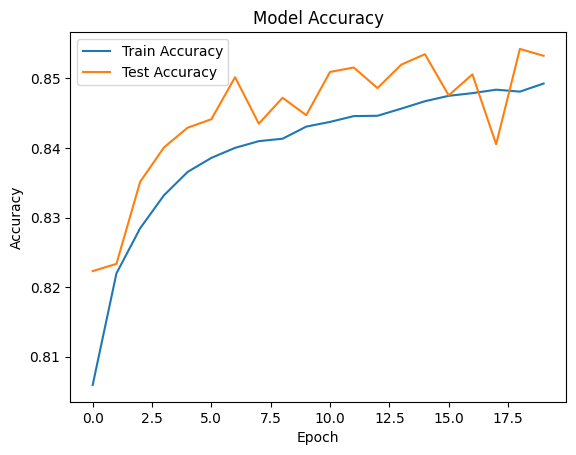

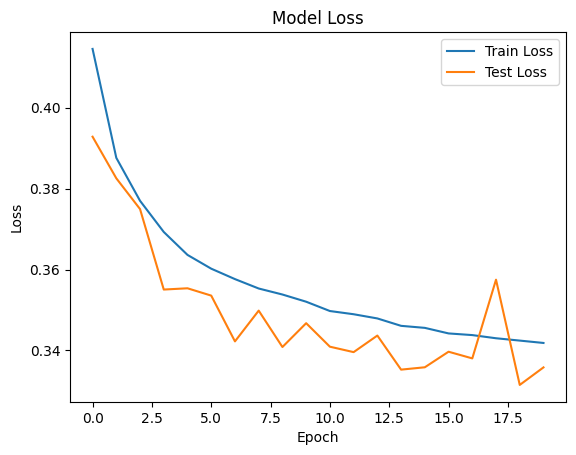

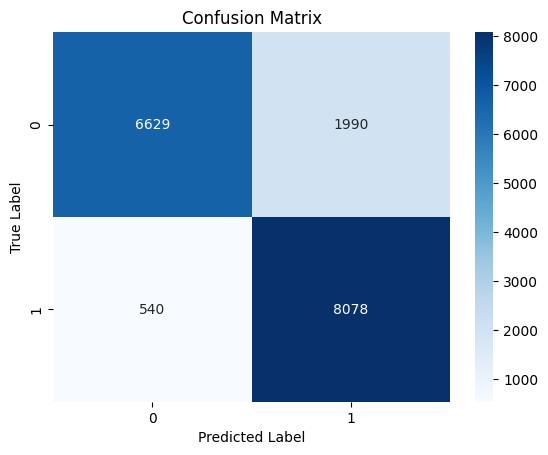

In [5]:


# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardize the features (scale them)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Build the FNN model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer (Binary classification, so we use sigmoid)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_resampled, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predicting on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))


# Evaluate with additional metrics
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plotting training history
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()